# **Data Science and Engineering Methods**

**Name: Shreyas Madhusudan Dasari**

**NUID: 002743612**

# **Topic: Crash Course in Statistical Learning Worked Examples on SVM Classification and Regression**

# Abstract:

Worked examples of regression and classification using the Support Vector Machine (SVM) are provided in this crash course in statistical learning. This course aims to give a thorough introduction to SVM, covering both its linear and nonlinear variations as well as its use in high-dimensional and big datasets. SVM is a potent machine learning technique used for classification and regression analysis. The course gives students a firm foundation in statistical learning and SVM through the use of a number of worked examples that show how SVM is actually applied in practical situations. Learners will be able to apply SVM to their own data by the end of the course and comprehend its advantages and disadvantages.

# Aim:

The purpose of this crash course in statistical learning is to introduce Support Vector Machine (SVM) classification and regression in detail and to demonstrate how they may be used in real-world situations using worked examples. The course specifically seeks to:

1. Introduce the principles of SVM classification and regression, including the kernel functions and optimization strategies used in both linear and nonlinear versions.
2. Give two practical examples to illustrate the application of SVM to classification and regression issues.
3. Give students practical experience applying SVM to real-world datasets by utilizing well-known Python packages like scikit-learn.
4. Improve students' comprehension of the benefits and drawbacks of SVM in various situations.

# Pointers:

1. The Support Vector Classifier **(SVC)** algorithm will be used in Example 1 and will concentrate on SVM classification. The idea of hyperplanes and margins in SVM will be explained to learners, who will also learn how to use SVC to categorize data.
2. The Support Vector Regression **(SVR)** algorithm will be used in Example 2 and will concentrate on SVM regression. The usage of SVR to forecast continuous values based on a set of input attributes will be taught to learners. Additionally, they will learn how to choose the proper kernel functions and adjust hyperparameters for SVR.










# **Code Examples:**

# **Importing the required libraries:**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR

# **Example 1 : Pima Indians Diabetes dataset**
# SVM Classification

# Description of the Dataset:

I have used the Pima Indians Diabetes Dataset for Classification of the Outcome variable. I will be using SVC for this particular example.

The Dataset consists of:

1. 8 diagnostic measures are present to predict whether a patient has diabetes or not. Independent variables are namely: 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'.
2. Outcome - The Dependent Variable.
3. The Outcome category consists of 0 and 1 values.
4. The shape of the dataset is 768 rows and 9 columns.

# **Loading the Dataset**

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ShreyasDasari/Data-Science-and-ML/main/CrashCourseInStatisticalLearningWorkedExamples/diabetes.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [4]:
#Checking the shape of the dataset
df.shape

(768, 9)

In [5]:
#Checking the datatype of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Checking if the dataset has null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#Checking the individual count of Diabetic and Non Diabetic Patients
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

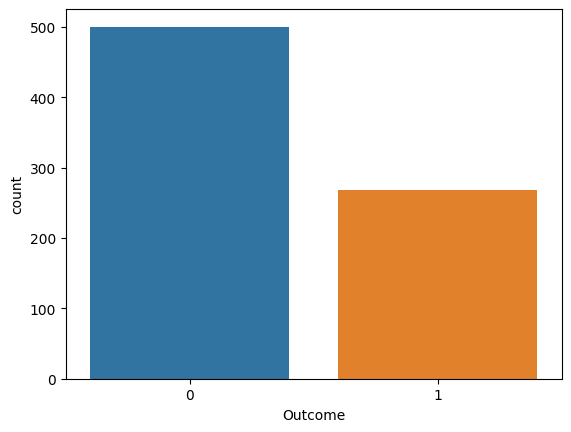

In [8]:
#Visualization of count of diabetic and non diabetic patients
sns.countplot(x='Outcome',data=df)
plt.show()

# **Countplot Explanation**

The count of diabetic and non-diabetic patients in the dataset is displayed in the following graphic. The two outcomes—0 for non-diabetics and 1 for diabetics—are shown on the x-axis, and the number of patients who fall under each category is shown on the y-axis. The graphic can be used to better understand any potential class imbalance and to illustrate how the dataset is distributed by classes.


In [9]:
#Description of the dataset
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [10]:
#Checking the correlation between variables
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

<Axes: >

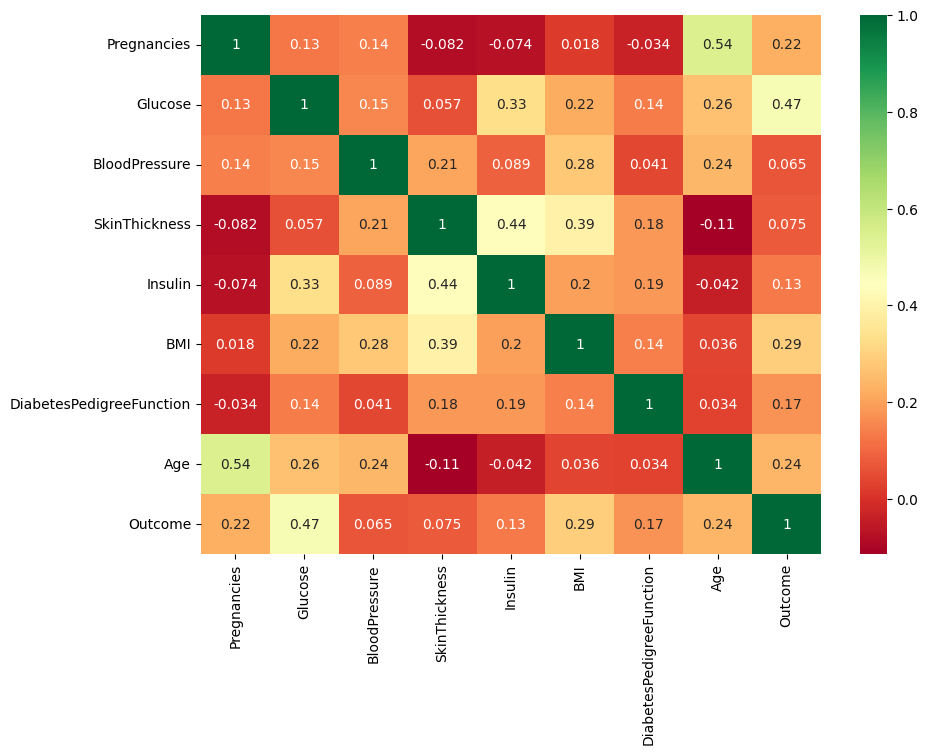

In [11]:
#Visually representing the Correlation in the form a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

# **Heatmap Correlation Analysis**

The individual values found in a matrix are represented as colors in a heatmap, which is a graphical representation of data. The correlation coefficients between each pair of numerical columns in the dataset are contained in this case's matrix. A value of 1 shows a perfect positive correlation, a value of 0 indicates no correlation, and a value of -1 indicates a perfect negative correlation. The correlation coefficient ranges from -1 to 1.

The heatmap plot can be used to find highly linked variables, which can be helpful for feature selection or for locating duplicated features in the dataset. Additionally, it can aid in locating potential connections between variables that might call for additional research or analysis.

Here, there no correlation between the independent variables.

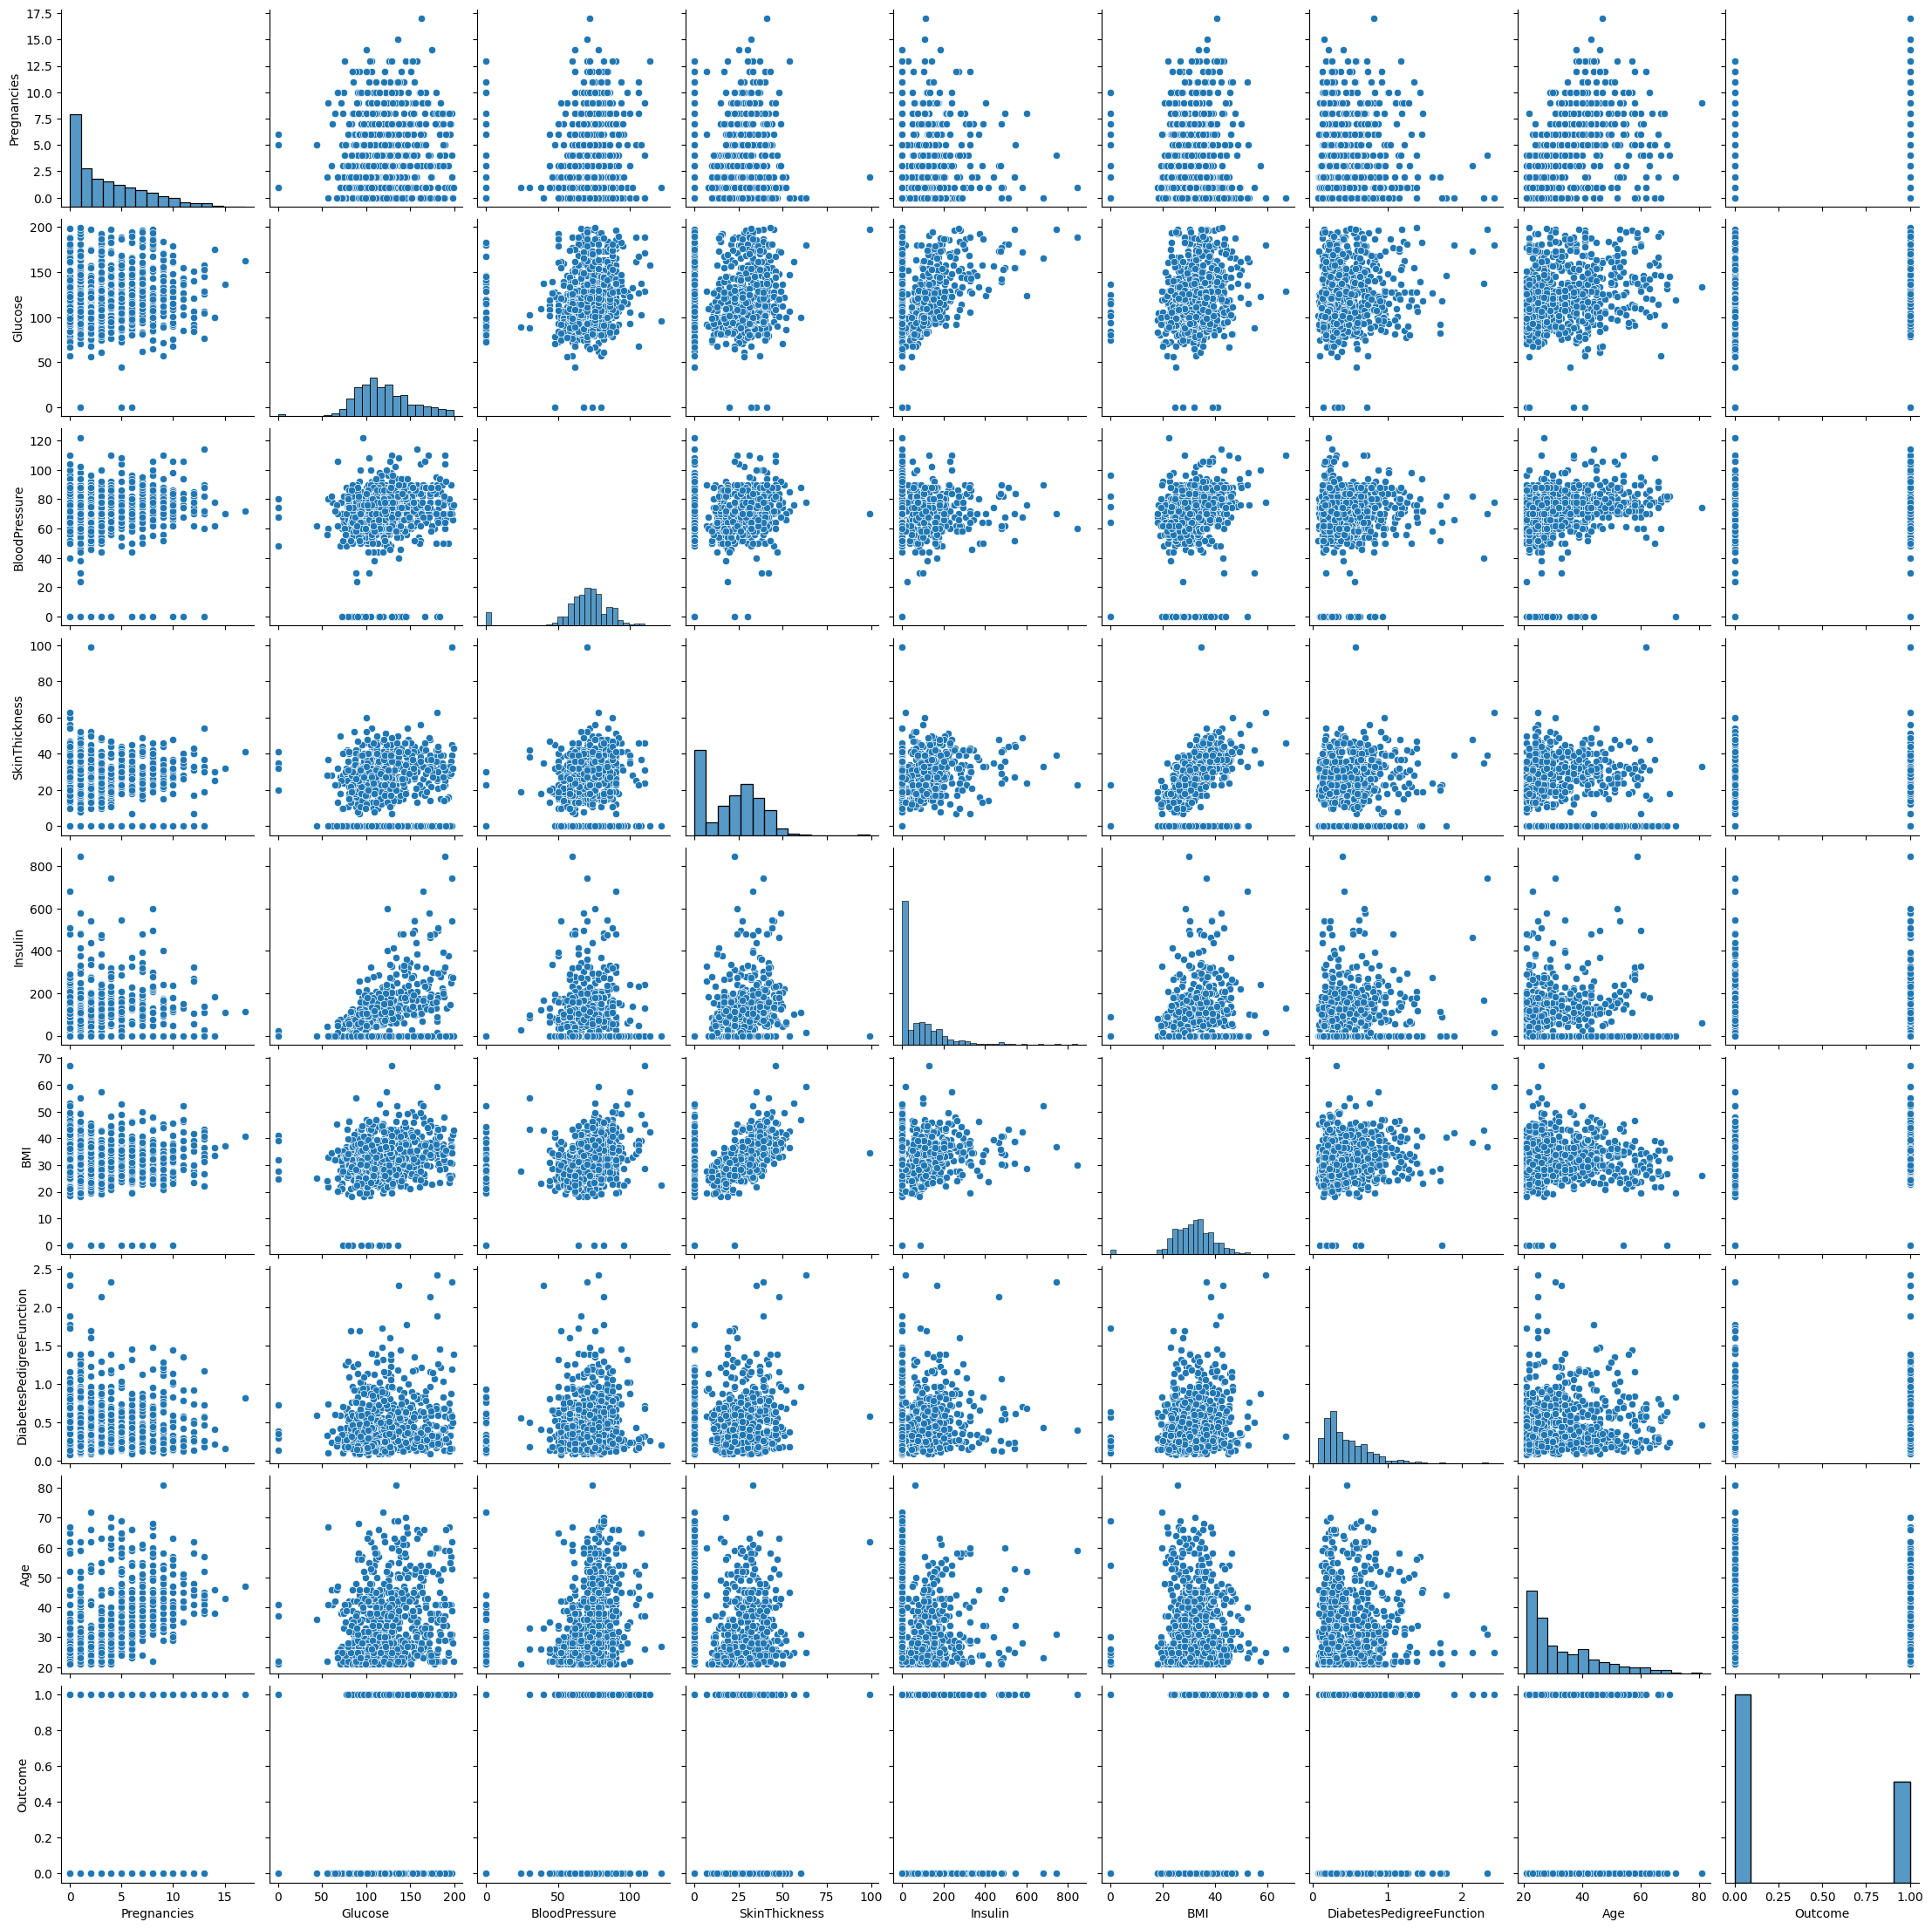

In [12]:
#Plotting the pairplot to check collinearity
sns.pairplot(df)

# **Pairplot Analysis**

The scatter plots for each pair of numerical columns in the dataset are shown in the pairplot plot that results. The distribution of each variable is displayed on the diagonal axis. Pair plots can be used to spot probable collinearity, which occurs when two or more variables have a high degree of correlation and share information. For some statistical models, collinearity can be an issue since it can result in unstable model coefficients and incorrect statistical inference.

One can obtain a sense of the direction and intensity of the link between the variables by looking at the scatter plots. For instance, a scatter plot that slopes upward from left to right denotes a strong positive link, whereas a scatter plot that slopes downward from left to right denotes a strong negative relationship.

* There is no coorelation between variables for this dataset.

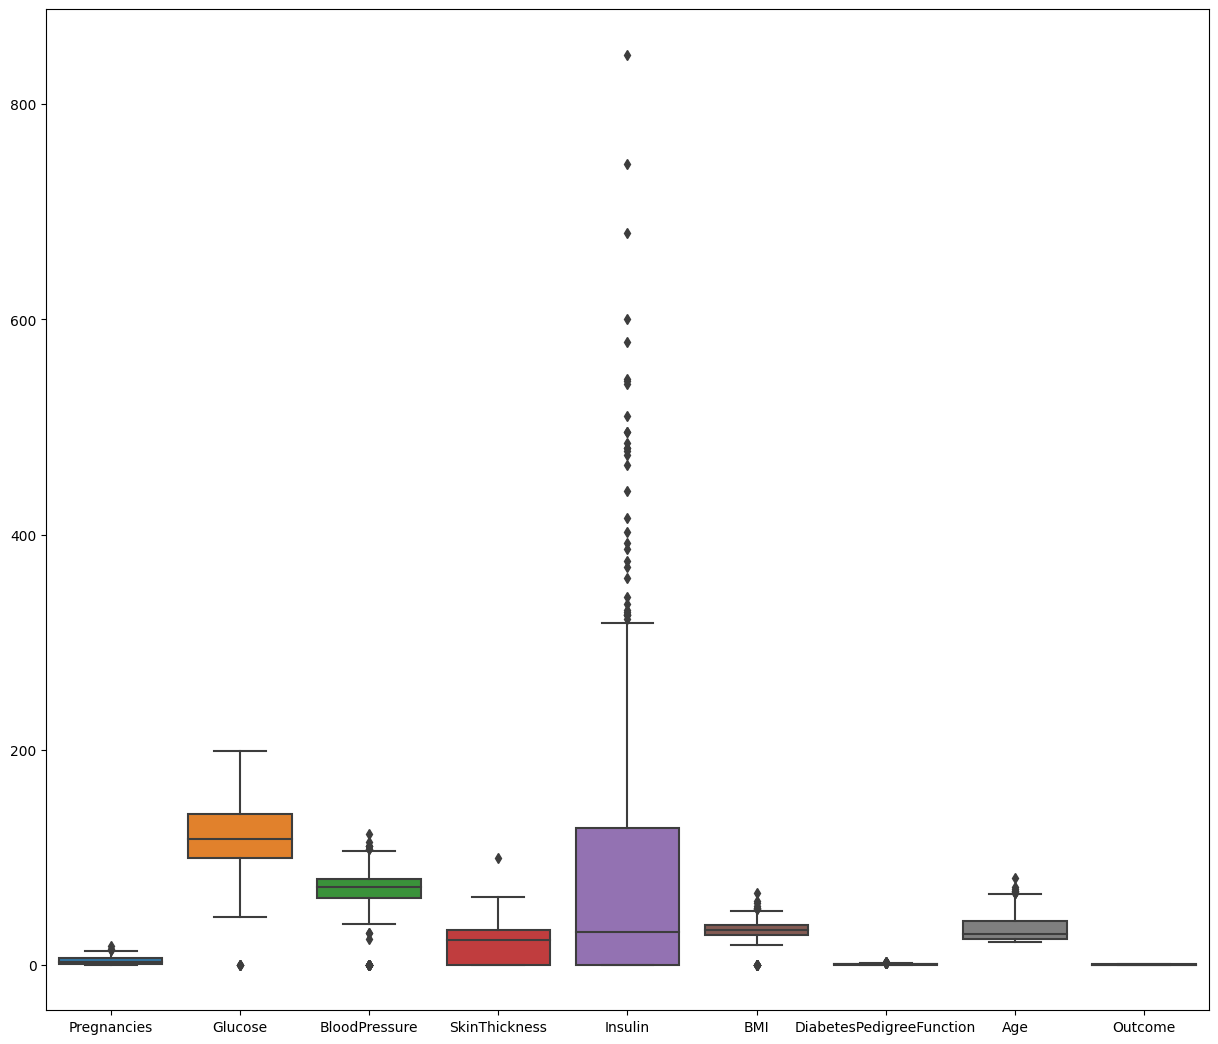

In [13]:
plt.figure(figsize=(15,13))
sns.boxplot(df)
plt.show()

# **Identifying Outliers using Boxplot**

* There are few outliers for almost all independent variables execpt Insulin.
* Insulin shows high number of outliers.

In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Figure size 800x500 with 0 Axes>

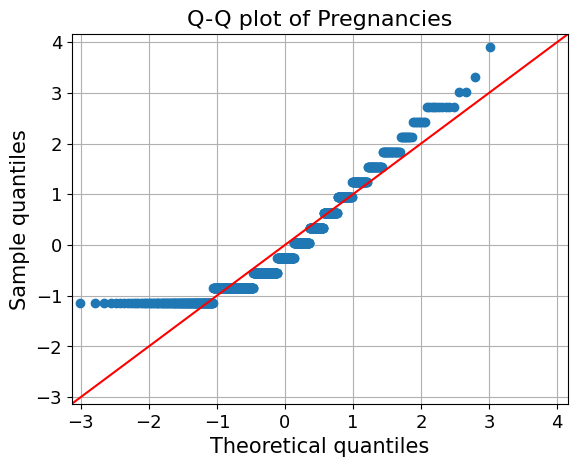

<Figure size 800x500 with 0 Axes>

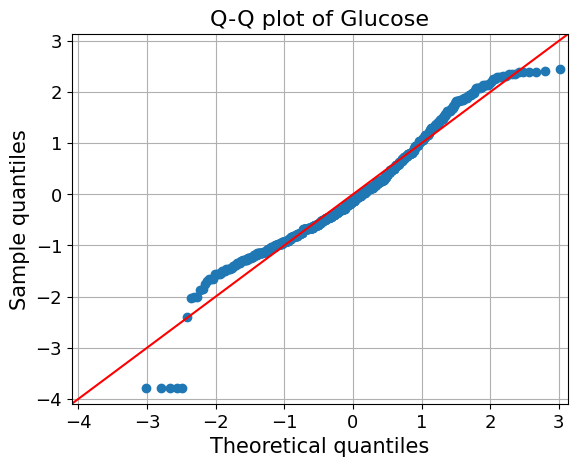

<Figure size 800x500 with 0 Axes>

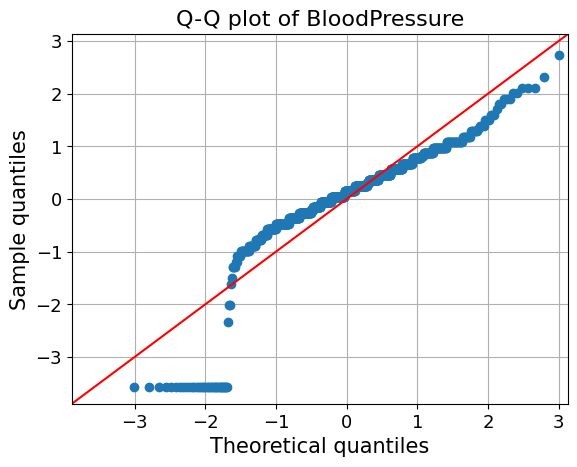

<Figure size 800x500 with 0 Axes>

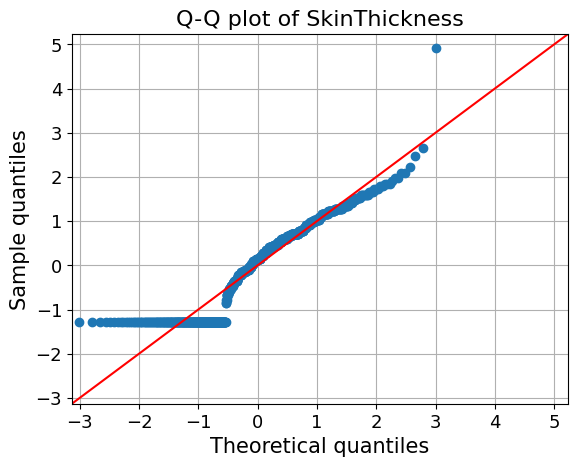

<Figure size 800x500 with 0 Axes>

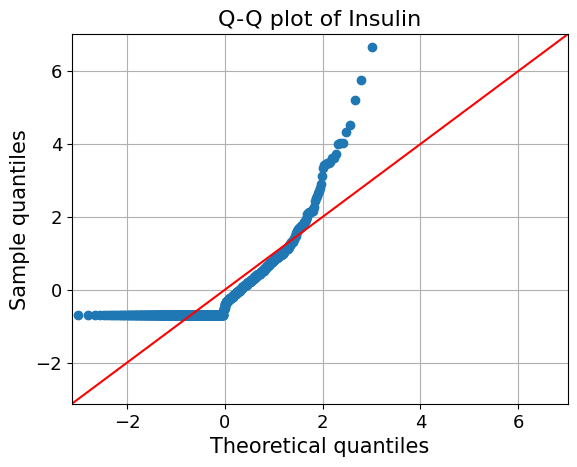

<Figure size 800x500 with 0 Axes>

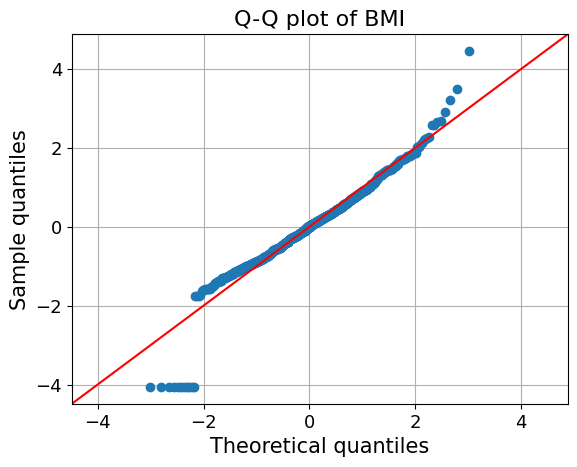

<Figure size 800x500 with 0 Axes>

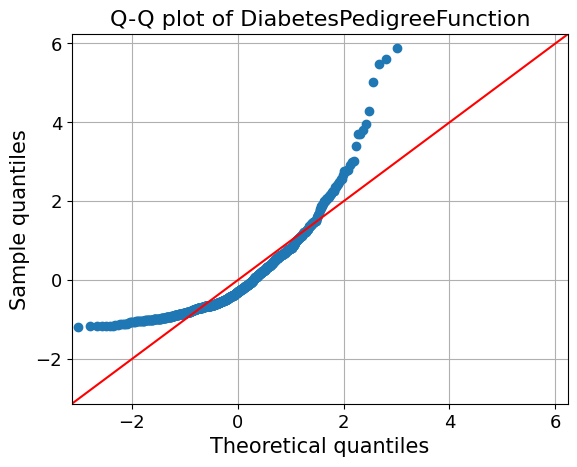

<Figure size 800x500 with 0 Axes>

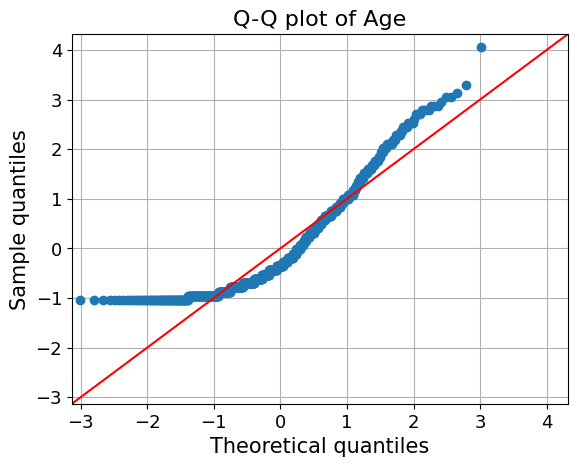

<Figure size 800x500 with 0 Axes>

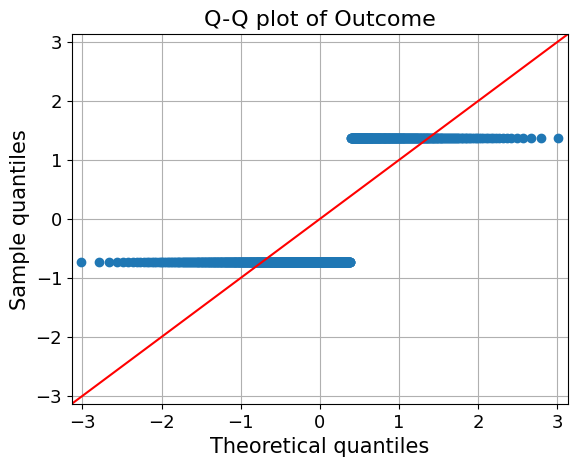

In [15]:
#Plotting qq-plot for all the features to understand if the variables follow the normal curve
from statsmodels.graphics.gofplots import qqplot
data = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]
for c in data.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

# **Quantile Graphs Inference**

* Examining the above QQ plots for each feature we can infer that almost all the variables follow the normal distribution.
* Insulin has a number of outliers and does not follow the normal distribution.

# **Data Modelling**

In [16]:
#Setting predictor variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [17]:
#Training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Feature Scaling**

In [18]:
#Preprocessing Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Implementing SVM Algorithm For Classification**

In [19]:
#Defining the SVC classifier model
svc = SVC(kernel='linear')

In [20]:
#Fitting the model
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
#Checking the predictions
y_pred = svc.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [22]:
from sklearn.metrics import accuracy_score
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7597402597402597


In [23]:
#Checking the confusion Matrix for further evaluation of the model
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[81 18]
 [19 36]]


In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [25]:
#Calculating the Area Under Curve
from sklearn.metrics import roc_auc_score,roc_curve

auc = roc_auc_score(y_test,y_pred)
print("AUC: %0.3f" %auc)

AUC: 0.736


In [26]:
#Defining variables for ROC Curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

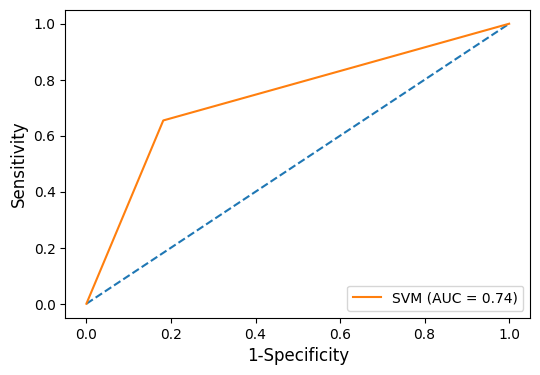

In [27]:
#Plotting the ROC Curve

plt.figure(figsize=(6,4))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr, label='SVM (AUC = %0.2f)'% auc)
plt.xlabel("1-Specificity",fontsize=12)
plt.ylabel("Sensitivity",fontsize=12)
plt.legend(loc='lower right')
plt.show()

# **ROC and AUC Explanation**

A binary classifier system's performance is graphically depicted by the ROC (Receiver Operating Characteristic) curve. It shows a plot of a binary classifier system's True Positive Rate (TPR) vs False Positive Rate (FPR) while the discrimination threshold is changed.

We must first define TPR and FPR in order to comprehend the ROC curve. The ratio of true positives to all of the actual positive cases is known as TPR, whereas the ratio of false positives to all of the genuine negative cases is known as FPR. In contrast to a false positive, which occurs when a negative case is mistakenly classified as positive, a true positive occurs when the classifier correctly detects a positive case.

Plotting TPR (sensitivity) on the y-axis and FPR (1 - specificity) on the x-axis for various classifier threshold values results in the ROC curve. Specificity is the proportion of negative situations that the classifier correctly identifies, whereas sensitivity is the fraction of positive cases that it correctly identifies.

A random classifier's performance is shown by the diagonal line from (0,0) to (1,1), but a perfect classifier will produce a curve that goes through the top-left corner of the plot. To measure the overall effectiveness of the classifier, the area under the ROC curve (AUC) is a frequently used metric. AUC of 0.5 denotes a random classifier, whereas AUC of 1 denotes flawless categorization.

The ROC curve is a valuable tool for assessing binary classification model performance and contrasting model performance. By locating the point on the curve that maximizes the TPR while minimizes the FPR, it can assist in determining the best threshold value for the classifier. It is also helpful for visualizing the overall performance of the classifier across all threshold values and for understanding the trade-off between sensitivity and specificity for a particular classifier.

The trade-off between the TPR and FPR for the SVM classifier model is displayed in the ensuing ROC curve plot. The classifier performs better the closer the curve is to the top left corner of the plot. **The AUC value in this situation is 0.74, indicating a moderate level of discrimination performance for the SVM model.**

Overall, the ROC curve plot can be a valuable tool for assessing binary classifier model performance and contrasting model performance.











# **Implementing Hyperparamter Tuning on SVC Model using GridSearchCV**

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define the pipeline with scaling and SVC
pipeline = make_pipeline(StandardScaler(), SVC())

# Define the grid of hyperparameters to search over
param_grid = {'svc__C': [0.1, 1, 10, 100], 'svc__gamma': [0.1, 0.01, 0.001, 0.0001], 'svc__kernel': ['linear', 'rbf']}

# Perform the grid search using cross-validation
grid = GridSearchCV(pipeline, param_grid=param_grid, verbose=2, cv=5)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .....svc__C=0.1, svc__gamma=0.1, svc__kernel=linear; total time=   0.0s
[CV] END .....svc__C=0.1, svc__gamma=0.1, svc__kernel=linear; total time=   0.0s
[CV] END .....svc__C=0.1, svc__gamma=0.1, svc__kernel=linear; total time=   0.0s
[CV] END .....svc__C=0.1, svc__gamma=0.1, svc__kernel=linear; total time=   0.0s
[CV] END .....svc__C=0.1, svc__gamma=0.1, svc__kernel=linear; total time=   0.0s
[CV] END ........svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf; total time=   0.0s
[CV] END ........svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf; total time=   0.0s
[CV] END ........svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf; total time=   0.0s
[CV] END ........svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf; total time=   0.0s
[CV] END ........svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf; total time=   0.0s
[CV] END ....svc__C=0.1, svc__gamma=0.01, svc__kernel=linear; total time=   0.0s
[CV] END ....svc__C=0.1, svc__gamma=0.01, svc__

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10, 100],
                         'svc__gamma': [0.1, 0.01, 0.001, 0.0001],
                         'svc__kernel': ['linear', 'rbf']},
             verbose=2)

In [29]:
# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters: ", grid.best_params_)
print("Best cross-validation score: ", grid.best_score_)

Best hyperparameters:  {'svc__C': 100, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
Best cross-validation score:  0.7752632280421166


In [30]:
#Checking the predictions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

grid_pred = grid.predict(X_test)
grid_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [31]:
#Calculating all the necessary scores required for analysis
print('Accuracy:', accuracy_score(y_test, grid_pred))
print('Precision:', precision_score(y_test, grid_pred))
print('Recall:', recall_score(y_test, grid_pred))
print('F1 score:', f1_score(y_test, grid_pred))

Accuracy: 0.7727272727272727
Precision: 0.6851851851851852
Recall: 0.6727272727272727
F1 score: 0.6788990825688074


In [32]:
#Reading the confusion matrix
print(confusion_matrix(y_test,grid_pred))

[[82 17]
 [18 37]]


In [33]:
#Getting the classification report
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82        99
           1       0.69      0.67      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



# **Calculating AUC Score and Plotting ROC Curve**

In [34]:
#Calculate AUC Score for GridSearchCV
auc_grid = roc_auc_score(y_test,grid_pred)
print('AUC: %.3f' % auc_grid)

AUC: 0.751


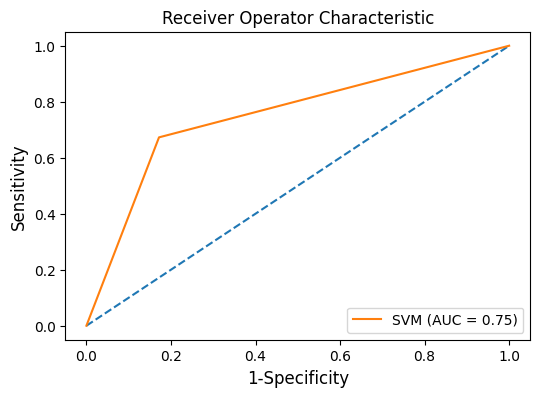

In [35]:
#Plotting the ROC Curve for GridSearchCV
fpr , tpr , thresholds = roc_curve(y_test,grid_pred)
plt.figure(figsize=(6,4))
plt.plot([0,1],[0,1],linestyle="--")
plt.title('Receiver Operator Characteristic')
plt.plot(fpr,tpr, label='SVM (AUC = %0.2f)'% auc_grid)
plt.xlabel("1-Specificity",fontsize=12)
plt.ylabel("Sensitivity",fontsize=12)
plt.legend(loc='lower right')
plt.show()

# **Comments on Hyperparameter Tuning and Cross Validation on SVC model using GridSearchCV**

* The evaluation metrics show that the model's accuracy increased by 2% after the hyperparameters were tuned.
The new model outperformed the old one with an Area Under the Curve (AUC) score of 0.75.
* AUC is a metric that assesses the model's overall performance; its highest value of 1 indicates a perfect classifier.
* The model is now performing better than before, as evidenced by the increased AUC value.
* The process of choosing the model's ideal parameter values that maximize its performance on the provided data is known as hyperparameter tuning.
* In order to create a reliable and accurate machine learning model, it is crucial.
* There are several methods for hyperparameter tweaking, such as grid search, random search, and Bayesian optimization.
* It entails assessing the model's performance for several parameter combinations and choosing the best one according to a predetermined standard, such as accuracy or AUC.


# **Example 2 : Scikit-learn Diabetes Dataset**
# SVM Regression

# Dataset Description:

* The Scikit-Learn library's load_diabetes() function is used to load the dataset.
* Diabetes patients' medical information can be found in the dataset.
* Ten traits (predictors) and one target variable (response variable) are present in the data.
* 'Age', 'sex', 'body mass index', 'average blood pressure', and six blood serum measures are among the feature variables.
* A numerical indicator of illness progression one year after baseline makes up the goal variable.
* The information is kept in a Pandas DataFrame object with the identifier df1.
* The target variable is one of the 442 rows and 11 columns in the DataFrame object.
* The DataFrame's rows and columns each correspond to a patient and a variable, respectively.
* The diabetes.feature_names element of the dataset contains the column names for the feature variables.
* Dependent variable: 'target'




# **Reading the Dataset**

In [36]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

df1 = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df1['target'] = diabetes.target

In [37]:
df1.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0

In [38]:
#Checking the shape of the dataset
df1.shape

(442, 11)

In [39]:
#Checking the datatype of the variables
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [40]:
#Checking if the dataset has null values
df1.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [41]:
#Checking the individual count of Diabetic and Non Diabetic Patients
df1['target'].value_counts()

200.0    6
72.0     6
90.0     5
178.0    5
71.0     5
        ..
73.0     1
222.0    1
86.0     1
79.0     1
57.0     1
Name: target, Length: 214, dtype: int64

In [42]:
#Description of the dataset
df1.describe()

age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260971e-01 -1.377672e-01   
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324559e-02 -3.317903e-02   
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947171e-03 -1.077698e-03   
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243232e-02  2.791705e-02   
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335973e-01  1.356118e-01   

           target  
count  442.000000  
mean   152.133484  
std     77.093005  
min     25.000000  
25%     87.000000  
50%    140.500000  
75%    211.500000  
max    346.000000

In [43]:
#Checking if the variables are correlated
df1.corr()

age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4        s5        s6    target  
age     0.203841  0.270774  0.301731  0.187889  
sex     0.332115  0.149916  0.208133  0.043062  
bmi     0.413807  0.446157  0.388680  0.586450  
bp      0.257650  0.393480  0.390430  0.441482  
s1      0.542207  0.515503  0.325717  0.212022  
s2      0.659817  0.318357  0.290600  0.174054  
s3     -0.738493 -0.398577 -0.273697 -0.394789  
s4      1.000000  0.617859  0.417212  0.430453  
s5      0.617859  1.000000  0.464669  0.565883  
s6      0.417212  0.464669  1.000000  0.382483  
target  0.430453  0.565883  0.382483  1.000000

<Axes: >

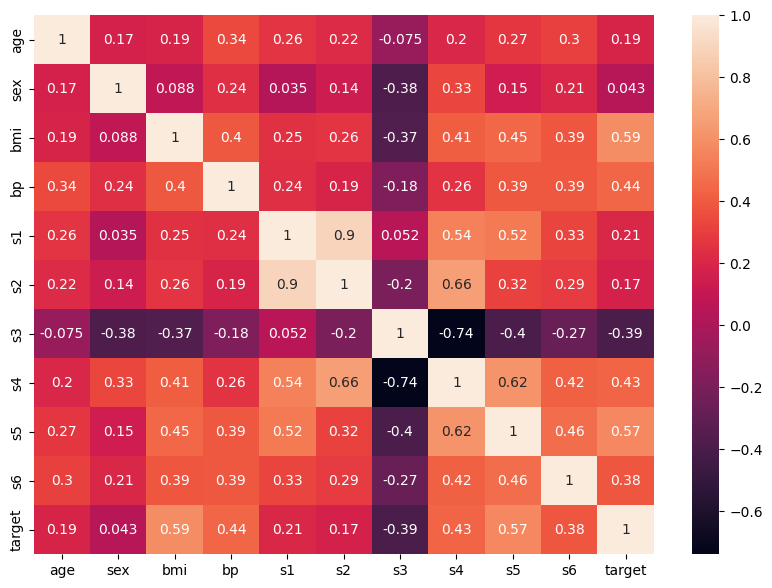

In [44]:
#Visually representing the Correlation in the form a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df1.corr(), annot=True)

## **Heatmap correlation Analysis**

The association between the 10 feature variables in the diabetes dataset may be derived from the heatmap. If there are any notable relationships between these features, they can be found using the heatmap that the algorithm produces.

A high positive or negative correlation between the related feature variables is indicated, for instance, if the heatmap is dark red or dark blue. A white or light-colored cell on the heatmap denotes a low or nonexistent connection between the corresponding feature variables.

If the value is more than 0.7 it shows multi-collinearity between the variables and we can see that blood serum samples such as : **s1 and s2, s3 and s4 show multi-collinearity.**

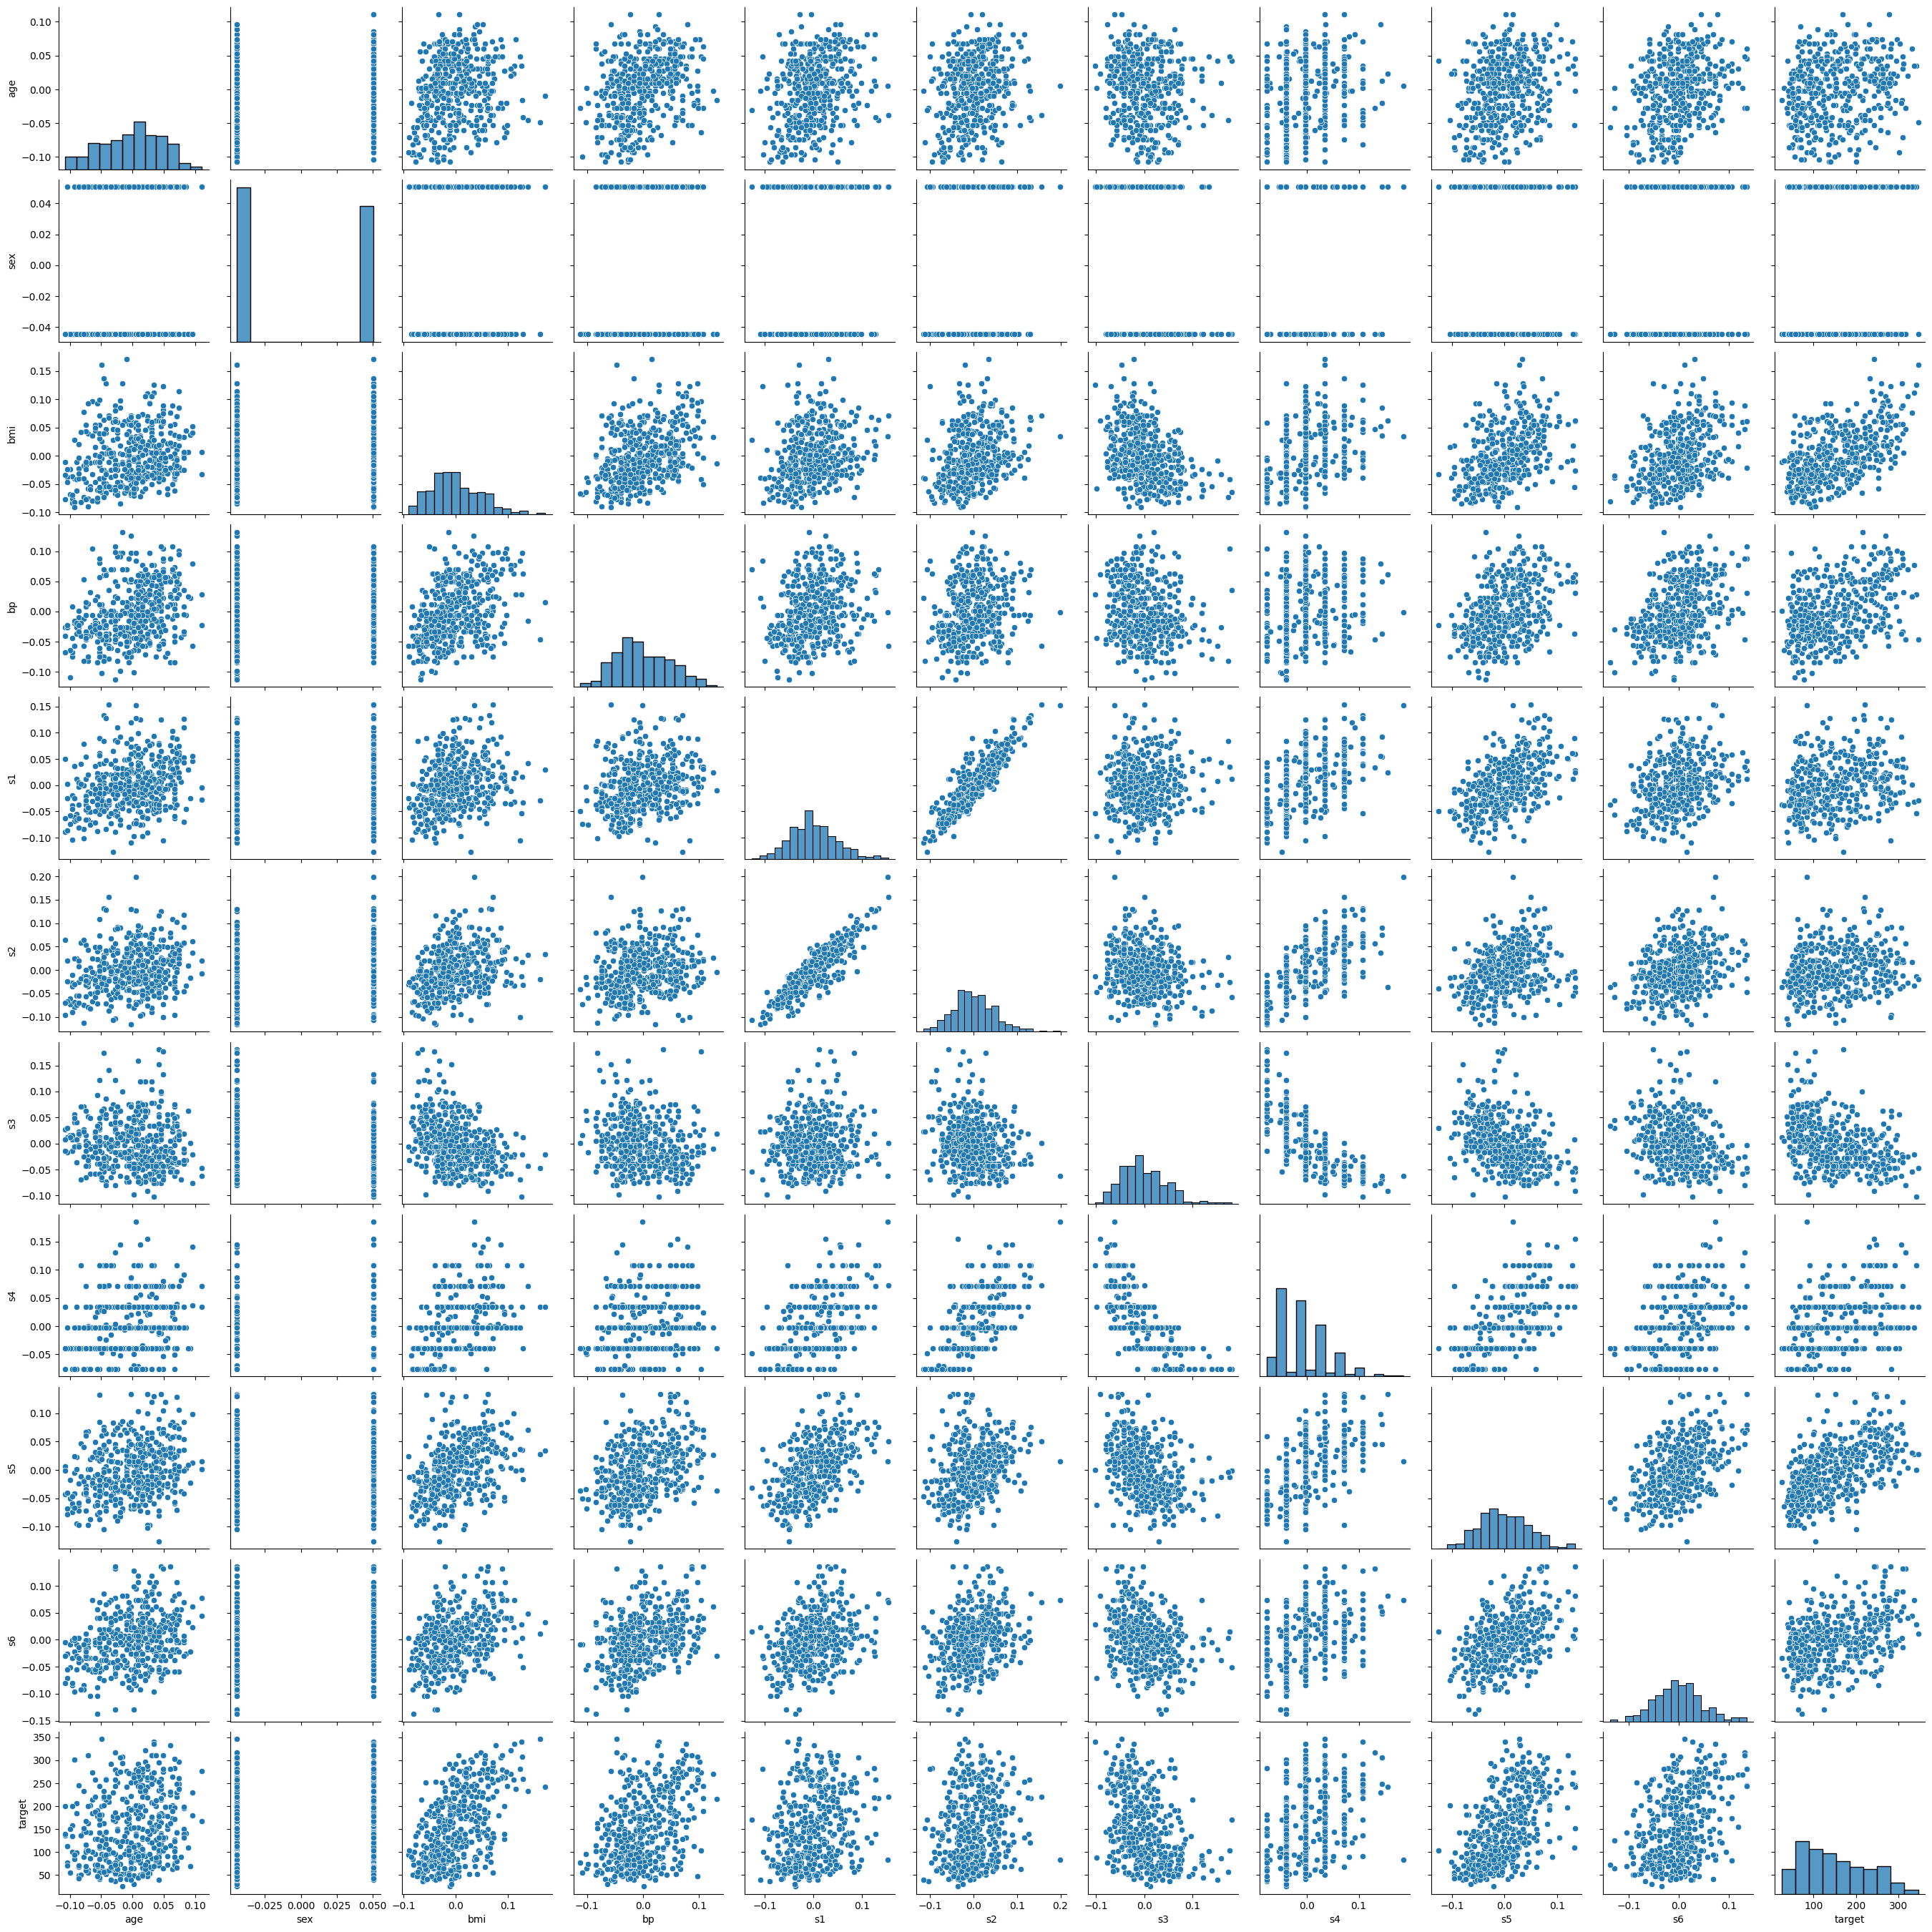

In [45]:
sns.pairplot(df1)

In [46]:
df1.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

<Figure size 800x500 with 0 Axes>

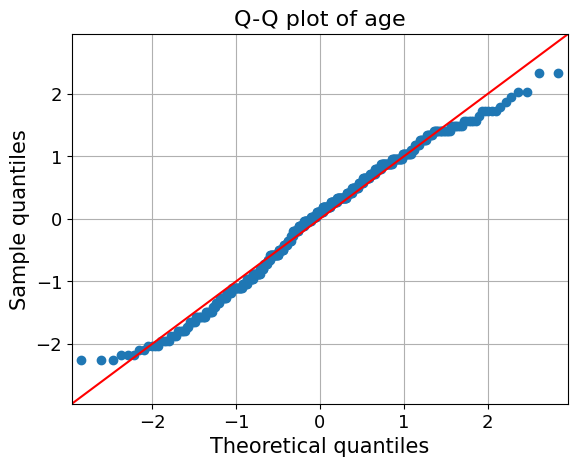

<Figure size 800x500 with 0 Axes>

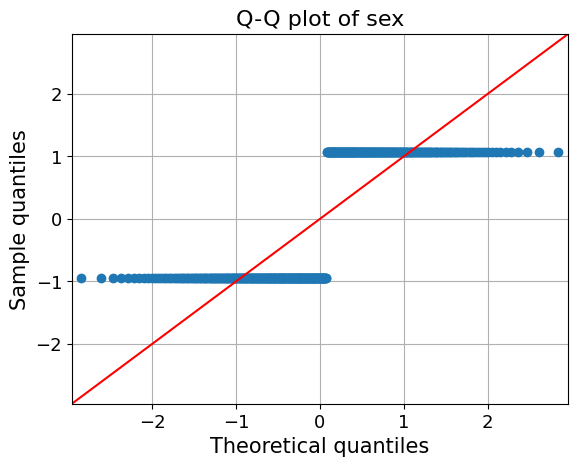

<Figure size 800x500 with 0 Axes>

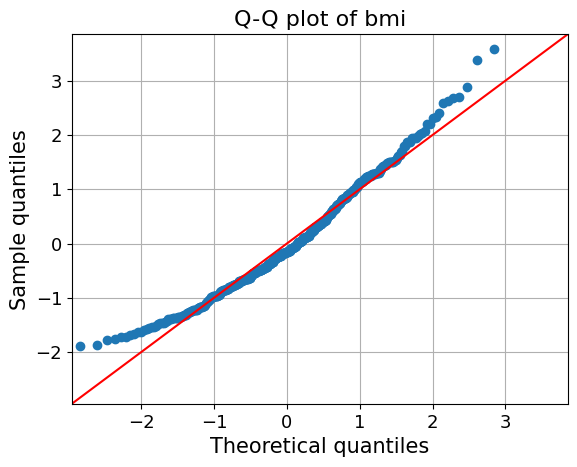

<Figure size 800x500 with 0 Axes>

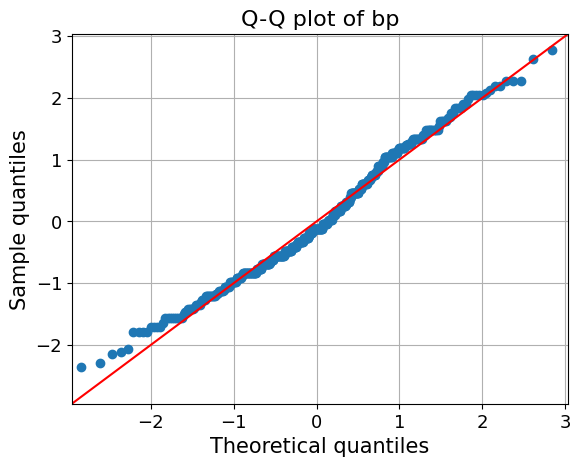

<Figure size 800x500 with 0 Axes>

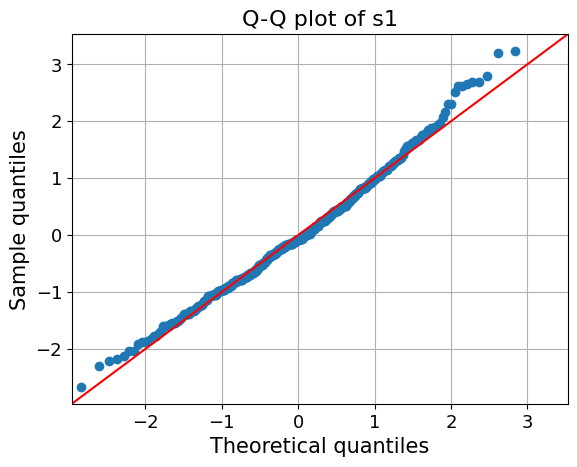

<Figure size 800x500 with 0 Axes>

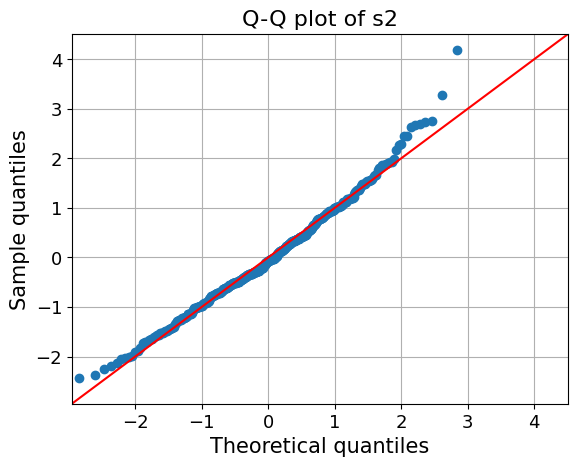

<Figure size 800x500 with 0 Axes>

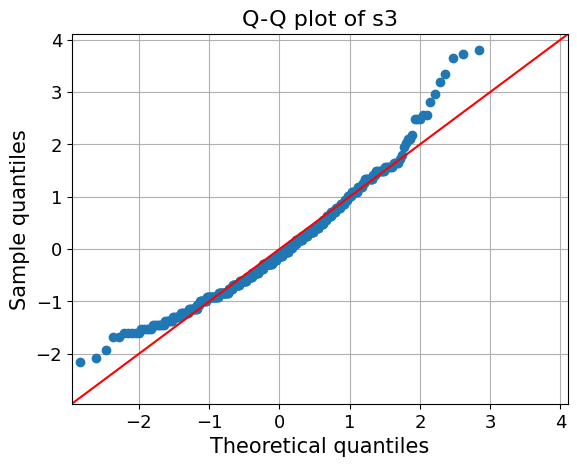

<Figure size 800x500 with 0 Axes>

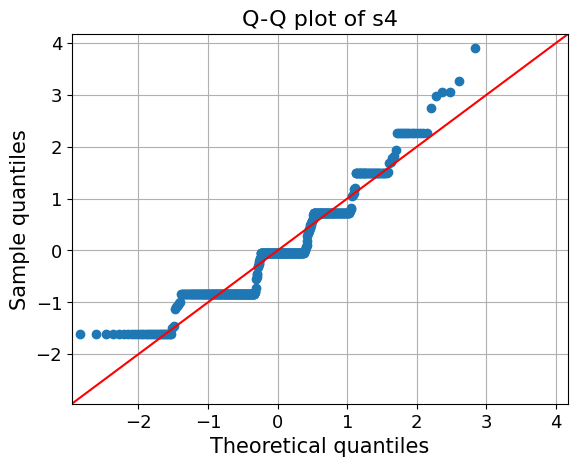

<Figure size 800x500 with 0 Axes>

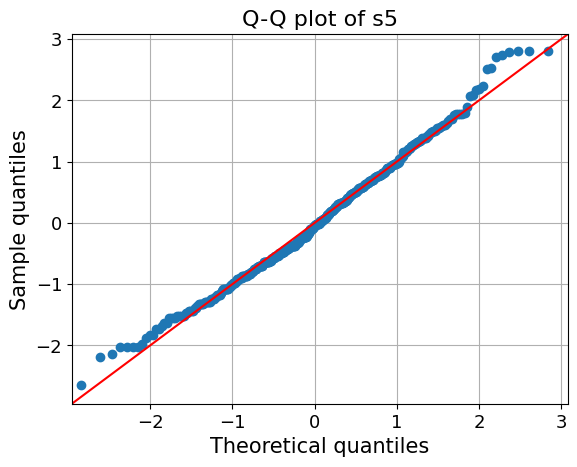

<Figure size 800x500 with 0 Axes>

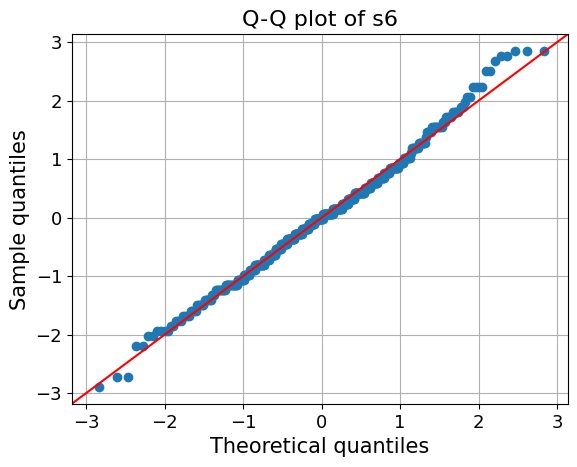

<Figure size 800x500 with 0 Axes>

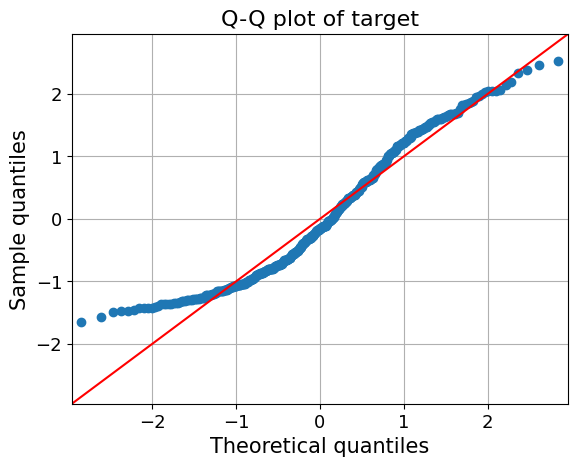

In [47]:
#Plotting qq-plot for all the features to understand if the variables follow the normal curve
from statsmodels.graphics.gofplots import qqplot
data = df1[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target']]
for c in data.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

## **QQ Plot Analysis**

Many statistical studies, including t-tests and linear regression, depend on the data's normality. The normalcy assumption must be verified as a result before any statistical analysis of the data is conducted. The results of the analysis may not be correct, and the conclusions drawn may be inaccurate, if the data are not regularly distributed. Therefore, Q-Q plots are a crucial tool for verifying the validity of the statistical analysis and the normalcy assumption.

By infering the above plots for each variable we can see that all the variables follow the normal distribution and can be used for correct analysis of the data.

# **Data Modelling**

In [48]:
#Setting predictor variable
X1 = df1.drop('target', axis=1)
y1 = df1['target']

In [49]:
#Training the model
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# **Feature Scaling**

In [50]:
#Preprocessing Data
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

# **Implementing SVM algorithm for Regression**

In [51]:
#Defining the SVR model
svr = SVR(kernel='linear')

In [52]:
#Fitting the model
svr.fit(X1_train, y1_train)

SVR(kernel='linear')

In [53]:
# Make predictions on the testing set
y1_pred = svr.predict(X1_test)
y1_pred

array([134.090152  , 177.1180441 , 132.81266972, 286.47702301,
       117.51500544,  92.26502113, 238.43510656, 178.40821252,
        85.31880156, 105.58667188,  93.0117305 , 158.93868821,
        68.48437426, 203.22768028, 103.49195069, 132.92129322,
       213.7453346 , 237.99753637, 194.9899616 , 207.01660283,
       197.27535671,  86.20018732,  77.1726352 , 183.04321125,
       150.23500701, 160.24319142, 182.13450627, 175.13589565,
        54.40778312, 109.42242595, 171.51085086,  91.79219564,
       124.50759352, 177.71638705, 166.01180462, 177.77378847,
       121.63631259, 116.30407627, 146.8678603 ,  62.18351552,
        83.26985569, 111.32712339, 158.21603735, 149.02852309,
       175.0942457 ,  64.85311647,  81.11167659, 112.48178181,
        64.96766487, 153.43291859, 152.12543364,  65.09039225,
       108.16750558, 110.96034172, 160.94219744, 151.99743423,
        96.12804849, 198.2272287 , 114.02957888,  72.54968942,
       175.08965025, 193.42976205, 135.73116981, 110.07

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate the mean squared error of the model
mse1 = mean_squared_error(y1_test, y1_pred)
mae1 = mean_absolute_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)

In [55]:
# Print the regression report
print('SVR Report:')
print('------------------')
print(f'Mean Squared Error: {mse1:.2f}')
print(f'Mean Absolute Error: {mae1:.2f}')
print(f'R-squared score: {r2:.2f}')

SVR Report:
------------------
Mean Squared Error: 2939.81
Mean Absolute Error: 43.34
R-squared score: 0.45


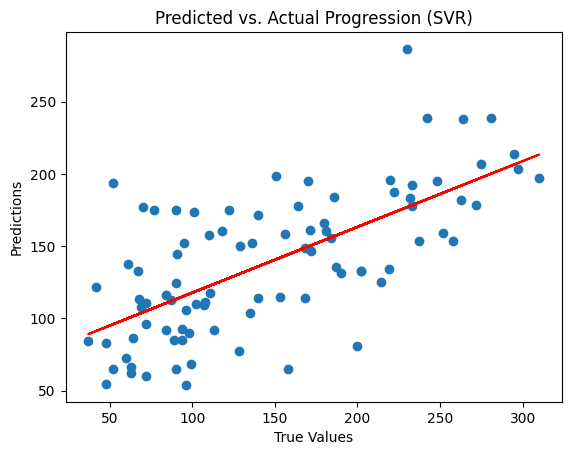

In [56]:
# Plot the predictions and the true values
plt.scatter(y1_test, y1_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs. Actual Progression (SVR)')

# Add a regression line to the plot
p = np.polyfit(y1_test, y1_pred, 1)
plt.plot(y1_test, np.polyval(p, y1_test), color='r')

plt.show()

# **Explanation of the above Scatter plot and Regression fit line**

We may evaluate the effectiveness of the regression model graphically using the scatter plot and regression line. The scatter plot will closely follow the regression line if the model is valid. The scatter plot will exhibit significant fluctuation away from the regression line if the model is inaccurate.

By examining the graphic, we can also spot any patterns or trends in the data that the regression model might have missed. A different kind of regression model might be better suitable for the data, for instance, if the scatter plot reveals a nonlinear relationship between the true and projected values.

The scatter plot shows the values are plotted a little far than the fit and so we can conclude that the model is performing moderately in this particular case.





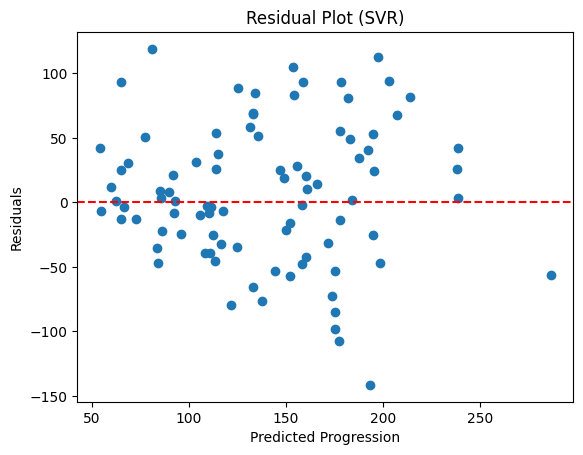

In [57]:
# Plot a residual plot
plt.scatter(y1_pred, y1_test - y1_pred)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Progression')
plt.ylabel('Residuals')
plt.title('Residual Plot (SVR)')
plt.show()


# **Residual Plot for SVR Model**

The expected values versus residuals (the discrepancy between the actual and anticipated values) are displayed in the above figure as a scatter plot. The model's errors should be independent of the anticipated values, as shown by the residuals' random distribution around the horizontal line at y=0.

A regression analysis's discrepancies between real and anticipated values are graphically represented by a residual plot. A residual plot can be utilized to assess the predictive efficacy of an SVR model. The graphic is made by plotting the predicted values on the x-axis and the residuals (the discrepancies between the actual and expected values) on the y-axis.

A residual plot should ideally display a random distribution of points that are uniformly spaced all around the zero line. This would suggest that the predictions made by the model are reliable and impartial. But if there is a pattern in the residuals, like a curve or an increase in variability, this would indicate that the model is not accurately reflecting the relationship.

# **Implementing Hyperparameter Tuning using GridSearchCV on SVR model**


In [58]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'sigmoid']}

svr = SVR()

grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5)
grid_search.fit(X1_train, y1_train)


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [59]:
#Getting the best parameters and best score for the gridsearch
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'sigmoid'}
Best score:  0.4721766621730379


# **Comments on Hyperparamter Tuning and Cross Validation on SVR model using GridSearchCV**

* The SVR model's score went up from 0.45 to 0.47 after hyperparameter adjustment made it more effective at fitting the data.
* The best hyperparameters discovered for the SVR model are "C": 10, "gamma": 0.1 and "kernel": "sigmoid."
* While 'gamma' regulates the model's kernel coefficient, hyperparameter 'C' controls the error term's penalty parameter. 
* The input data are transformed into a higher-dimensional feature space using the'sigmoid' kernel.
* In order to determine which combination of the given hyperparameter values yields the highest performance score, GridSearchCV thoroughly examines all possible combinations.


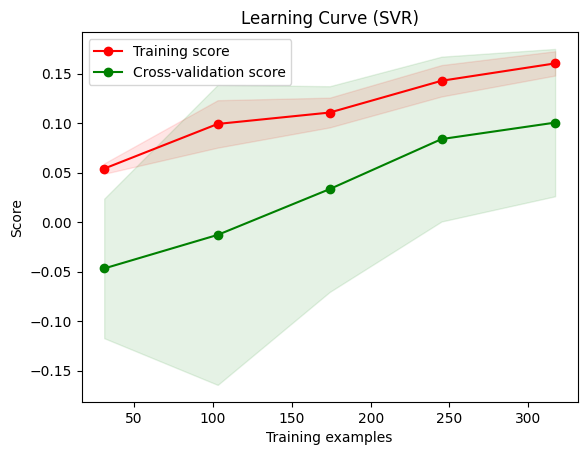

In [60]:
from sklearn.model_selection import learning_curve

# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(svr, X1_train, y1_train, cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve (SVR)')
plt.legend(loc='best')
plt.show()


# **Learning Curve Explanation**

The SVR model's learning curve will be depicted in this plot, which will show how the model's performance increases with the quantity of training instances. The cross-validation score is represented by the green line, while the training score is represented by the red line. The performance of the model may not be considerably enhanced by adding more training instances if the two lines converge and plateau.

Understanding the learning curve is essential for comprehending how well machine learning models work. It can be used to assess the ideal quantity of training data and to detect whether the model is underfitting or overfitting. The learning curve will show low training and validation scores if the model is underfitting. This suggests that the model needs to be made more sophisticated because it is now too simplistic. The learning curve will show a high training score but a low validation score if the model is overfitting, on the other hand. This suggests that the model has to be streamlined because it is too complicated.



# **Conclusion**

1. The Pima Indians Diabetes dataset is the first dataset (df) and The Scikit-learn Diabetes dataset is the second dataset(df1).
2. A supervised learning model employing the Support Vector Machine (SVM) technique has been developed using both datasets specifically first dataset SVC and second dataset SVR.
3. Accuracy was used to gauge how well the df model was doing; following hyperparameter modification, accuracy increased from 0.75 to 0.77.
4. The best result for the model based on df1 improved from 0.45 to 0.47 following hyperparameter modification, in contrast, when tested using r2 score.
5. Support Vector Regression (SVR), a form of SVM used for regression tasks, was utilized in the model produced on df1, whilst Support Vector Classification (SVC), a variation of SVM used for classification tasks, was employed in the model built on df.

Overall, the results imply that, albeit modestly, the hyperparameter adjustment enhanced the performance of both models. It's also important to keep in mind that the metrics accuracy and r2 score are used to assess classification and regression models, respectively. As a result, it might not be suitable to directly compare the effectiveness of the two models using these indicators.


# **References**

* https://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf
* https://vitalflux.com/classification-model-svm-classifier-python-example/
* https://dataaspirant.com/svm-kernels/#t-1608054630732
* https://scikit-learn.org/stable/modules/svm.html
* https://www.kaggle.com/code/prashant111/svm-classifier-tutorial/notebook
* https://www.kaggle.com/code/skyzizou86/prediction-of-diabetes-dataset-using-kernel-svm/notebook


# **License**

Copyright (c) 2023 Shreyas Dasari

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.